 ## ***MOVIE RATING PREDICTION WITH PYTHON*** ##

**Our Task is to Build a model that predicts the rating of a movie based on features like genre, director, and actors.**

For Any Machine Learning Model, the following are the key steps to follow:
 1. Look at the big picture.
 2. Get the data.
 3. Discover and visualize the data to gain insights.
 4. Prepare the data for Machine Learning algorithms.
 5. Select a model and train it.
 6. Fine-tune your model.
 7. Present your solution.
 8. Launch, monitor, and maintain your system.



 **Look at the Big picture.** 

 Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
 
 The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
 
 Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine
 learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In The problem stament, States That we need to make a movie rating prediction system. The system should be able to predict the rating of a movie based on the features like features like genre, director, and actors. 

**the data we will use is Lable data. as per this we can use  Supervised/Unsupervised Learning techniques.** 

**and for this movie rating prediction system we will use Regression algorithem.**

 **Select a Performance Measure** 

Your next step is to select a performance measure. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors. Equation 2-1 shows the mathematical formula to compute the RMSE.

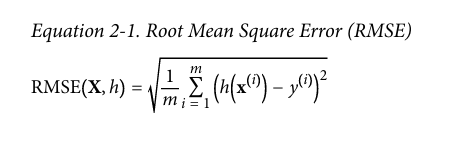

**Assumptions**

Historical Data Quality: The historical movie data used is accurate, complete, and representative of general rating trends.

Feature Relevance: Features like genre, director, actors, and release year significantly influence movie ratings.

Numeric Ratings: Ratings are treated as continuous numerical values suitable for regression.

No Drastic Market Shifts: Audience preferences and rating behavior remain relatively consistent over time.

Independence: Each movie’s rating is independent of others (no series/part influence assumed unless modeled).

No Bias in Ratings: Ratings from users or critics are unbiased and fairly distributed across movies.

Feature Engineering: Categorical features like genre and actors can be effectively encoded for ML models.

Model Generalization: The trained model can generalize well to unseen data, given similar feature distributions.

Now our next step is to 

**Discover and visualize the data to gain insights.** 

In [81]:
import pandas as pd 

data = pd.read_csv(r"C:\Users\manth\Desktop\codesoft\internship_task2\IMDB.csv", encoding='latin1')

data.head(100)



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
95,417 Miles,(2016),75 min,Drama,4.8,9,Mainak Dhar,Marilia Colturato,Kyara Jacob,Kyara Ralella Jacob
96,42 Kms.,(2009),NaN,"Drama, Sport",3.9,14,Nisha Chainani,Mandira Bedi,Bikram Saluja,Sammir Dattani
97,498A-The Wedding Gift,(2012),113 min,"Drama, Family, Musical",7.8,21,Suhaib Ilyasi,Srishti Gautam,Farida Jalal,Supriya Karnik
98,4pm on the Court,(2011),115 min,Sport,NaN,NaN,Shine Krishna,Ashish Bhatia,Naveen Kaushik,Vinay Sharma


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [83]:
data.infer_objects()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


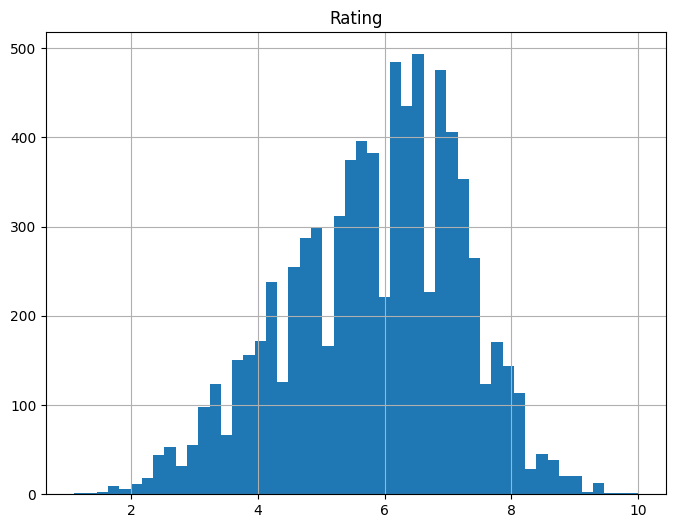

In [85]:
import matplotlib.pyplot as plt
 
data.hist(bins=50, figsize=(8, 6))

plt.show()

### Insights from the Data Distribution Graph

from this histogram gives us the idea of how many movies fall under which rating categories

**Prepare the data for Machine Learning algorithms**

It’s time to prepare the data for your Machine Learning algorithms. Instead of just doing this manually, you should write functions to do that, for several good reasons:

 • This will allow you to reproduce these transformations easily on any dataset (e.g.,
 the next time you get a fresh dataset).

 • You will gradually build a library of transformation functions that you can reuse
 in future projects.

 • You can use these functions in your live system to transform the new data before
 feeding it to your algorithms.
 
 • This will make it possible for you to easily try various transformations and see
 which combination of transformations works best.

**Data Cleaning**

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. 

## Data Cleaning Steps

We will perform the following data cleaning steps on the IMDB dataset:

1. **Remove rows with missing essential values** (e.g., Name, Rating, Genre).
2. **Convert columns to appropriate data types** (e.g., Year to int, Rating to float).
3. **Fill or drop missing values** in less essential columns (e.g., fill missing actors with 'Unknown').
4. **Remove duplicate rows** if any.
5. **Standardize categorical values** (e.g., strip spaces, consistent capitalization).
6. **Check for outliers or invalid values** (e.g., Ratings outside 0-10).

Let's apply these steps below.

In [86]:
# 1. Remove rows with missing essential values (Name, Rating, Genre)
data_clean = data.dropna(subset=["Name", "Rating", "Genre"])

# 2. Convert columns to appropriate data types
data_clean["Year"] = pd.to_numeric(data_clean["Year"].str.extract(r'(\d{4})')[0], errors='coerce')
data_clean["Rating"] = pd.to_numeric(data_clean["Rating"], errors='coerce')
data_clean["Votes"] = pd.to_numeric(data_clean["Votes"].str.replace(',', ''), errors='coerce')

# 3. Fill missing values in less essential columns
data_clean[["Duration", "Director", "Actor 1", "Actor 2", "Actor 3"]] = data_clean[["Duration", "Director", "Actor 1", "Actor 2", "Actor 3"]].fillna("Unknown")

# 4. Remove duplicate rows
data_clean = data_clean.drop_duplicates()

# 5. Standardize categorical values (strip spaces, consistent capitalization)
for col in ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]:
    data_clean[col] = data_clean[col].astype(str).str.strip().str.title()

# 6. Check for outliers or invalid values in Rating (should be between 0 and 10)
data_clean = data_clean[(data_clean["Rating"] >= 0) & (data_clean["Rating"] <= 10)]

# Show cleaned data info
data_clean.info()
data_clean

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7817 non-null   object 
 1   Year      7817 non-null   int64  
 2   Duration  7817 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7817 non-null   float64
 5   Votes     7817 non-null   int64  
 6   Director  7817 non-null   object 
 7   Actor 1   7817 non-null   object 
 8   Actor 2   7817 non-null   object 
 9   Actor 3   7817 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 671.8+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,Unknown,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,Unknown,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**Handling Text and Categorical Attributes**

## Encoding Categorical Attributes

Most machine learning models require numerical input, so we need to convert categorical columns (like Genre, Director, and Actors) into a numerical format. We will use one-hot encoding, which creates a new column for each unique category in these columns. This is especially useful for nominal data, where the categories do not have an inherent order.

In [87]:
from sklearn.preprocessing import LabelEncoder

# Copy the cleaned data to avoid overwriting
label_encoded_data = data_clean.copy()
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]:
    label_encoded_data[col] = le.fit_transform(label_encoded_data[col])

# Show the first few rows of the label-encoded data
print(label_encoded_data.head())



                                 Name  Year Duration  Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019  109 min    268     7.0      8   
3                             #Yaaram  2019  110 min    207     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997  147 min    177     4.7    827   
6                           ...Yahaan  2005  142 min    331     7.4   1086   
8                  ?: A Question Mark  2012   82 min    367     5.6    326   

   Director  Actor 1  Actor 2  Actor 3  
1       805     1757     2774      373  
3      1730     1566      876     2543  
5      1981      498       85     2422  
6      2618      913     1363     2997  
8       173     2487     1435     1189  


**Create a Test Set**

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [88]:
from sklearn.model_selection import train_test_split

# Drop rows with missing target (Rating)
data = data.dropna(subset=['Rating'])

# Select features and target
y = data['Rating']
X = data[['Genre', 'Votes','Director', 'Actor 1', 'Actor 2', 'Actor 3']]

# For simplicity, fill missing values in features with 'Unknown'
X = X.fillna('Unknown')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
8157,"Comedy, Drama",10,Ronit Jadhav,Ronit Jadhav,Rohit D'Souza,Darshil Gandhi
8455,Drama,16,Shibu Mitra,Shashi Kapoor,Pran,Amjad Khan
14490,"Drama, War","17,774",Kabir Khan,Salman Khan,Sohail Khan,Om Puri
2697,Action,17,Gautam Verma,Rajat Bedi,Mithun Chakraborty,Dinesh Hingoo
15470,"Documentary, Biography, Musical",33,Sandip Ray,Kishore Kumar,Amitabh Bachchan,Asha Bhosle
...,...,...,...,...,...,...
10137,"Biography, Drama, Thriller","21,470",Ram Madhvani,Sonam Kapoor,Shabana Azmi,Yogendra Tiku
10449,"Drama, Romance",79,Shakti Samanta,Shammi Kapoor,Asha Parekh,Prem Chopra
1527,Action,65,Raj N. Sippy,Dharmendra,Rekha,Mithun Chakraborty
14938,"Biography, Drama",144,G.V. Iyer,Sarvadaman Banerjee,Mithun Chakraborty,Rakhee Gulzar


In [89]:
X_test

,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
9456,Romance,6,Gautam Siddhartha,Akshay Anand,Sangeeta Ghosh,Amjad Khan
14816,"Action, Biography, Crime",711,Ram Gopal Varma,Sachiin Joshi,Sandeep Bharadwaj,Usha Jadhav
3213,"Action, Adventure, Thriller","2,425",Aditya Datt,Vidyut Jammwal,Adah Sharma,Gulshan Devaiah
3778,Drama,242,Ashwini Chaudhary,Om Puri,Revathi,Gul Panag
5775,Horror,11,Suraj Bharti,Sahilraj Dewangen,Johnny Janarden,Shubham Kathe
...,...,...,...,...,...,...
2710,"Drama, Thriller",38,Manish Harishankar,Soha Ali Khan,Zakir Hussain,Seema Biswas
7536,Romance,12,Prem Narayan Arora,Shyama,Balraj Sahni,Chitra
15353,"Action, Thriller",25,Narayana Rao Dasari,Jeetendra,Dimple Kapadia,Amrish Puri
9942,Drama,9,Dhalapathi,Manager Cheena,Ganthimathi,Charu Haasan


In [90]:
y_train

8157     8.8
8455     6.0
14490    3.8
2697     5.8
15470    8.2
        ... 
10137    7.6
10449    7.2
1527     6.3
14938    6.6
14297    6.8
Name: Rating, Length: 6335, dtype: float64

In [91]:
y_test

9456     3.3
14816    5.3
3213     5.7
3778     7.2
5775     3.5
        ... 
2710     5.9
7536     5.8
15353    4.5
9942     5.0
8466     8.6
Name: Rating, Length: 1584, dtype: float64

**Select a model and train it**

At last! we framed the problem, and got the data and explored it, we also sampled a
training set and a test set now we are ready to select and train a Machine Learning model

 **Training and Evaluating on the Training Set**


Model Evaluation:
Root Mean Squared Error: 1.23
Mean Absolute Error: 0.97
R2 Score: 0.19


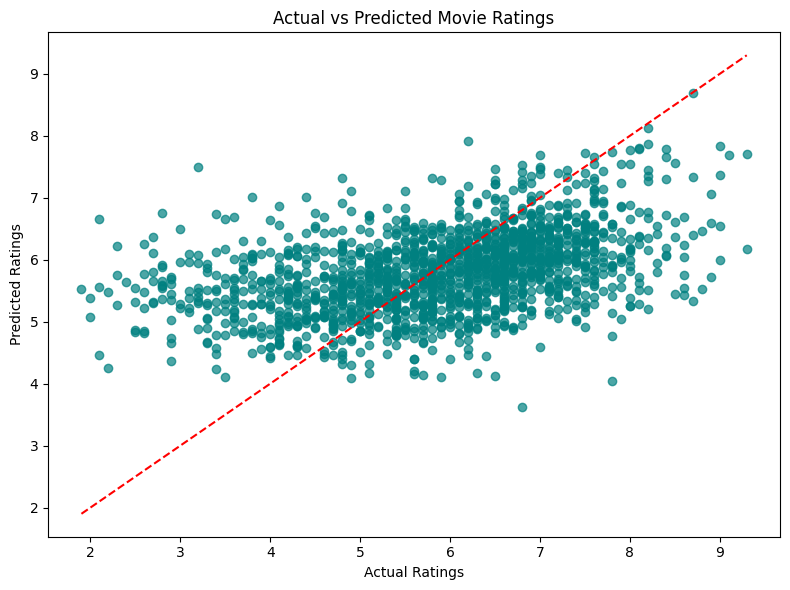

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Encode categorical columns
le = LabelEncoder()
data['Genre_encoded'] = le.fit_transform(data['Genre'])
data['Director_encoded'] = le.fit_transform(data['Director'])
data['Actor1_encoded'] = le.fit_transform(data['Actor 1'])
data['Actor2_encoded'] = le.fit_transform(data['Actor 2'])
data['Actor3_encoded'] = le.fit_transform(data['Actor 3'])

# Clean Votes column
data['Votes'] = data['Votes'].astype(str).str.replace(',', '')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Clean and convert Year and Duration columns
data['Year'] = data['Year'].astype(str).str.extract(r'(\\d{4})')[0]
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

data['Duration'] = data['Duration'].astype(str).str.extract(r'(\\d+)')[0]
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Remove 'Year' and 'Duration' from features
features = ['Genre_encoded', 'Votes', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']
X = data[features]
y = data['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

In [93]:
def predict_movie_rating_user_input():
    # Get user input
    genre = input("Enter Genre: ")
    director = input("Enter Director: ")
    actor1 = input("Enter Actor 1: ")
    actor2 = input("Enter Actor 2: ")
    actor3 = input("Enter Actor 3: ")
    votes = input("Enter Votes: ")

    # Use the same encoding as in the training data
    try:
        genre_encoded = data.loc[data['Genre'] == genre, 'Genre_encoded'].iloc[0]
    except IndexError:
        genre_encoded = 0  # or handle as unknown

    try:
        director_encoded = data.loc[data['Director'] == director, 'Director_encoded'].iloc[0]
    except IndexError:
        director_encoded = 0

    try:
        actor1_encoded = data.loc[data['Actor 1'] == actor1, 'Actor1_encoded'].iloc[0]
    except IndexError:
        actor1_encoded = 0

    try:
        actor2_encoded = data.loc[data['Actor 2'] == actor2, 'Actor2_encoded'].iloc[0]
    except IndexError:
        actor2_encoded = 0

    try:
        actor3_encoded = data.loc[data['Actor 3'] == actor3, 'Actor3_encoded'].iloc[0]
    except IndexError:
        actor3_encoded = 0

    # Prepare input for prediction
    input_features = np.array([[genre_encoded, int(votes), director_encoded, actor1_encoded, actor2_encoded, actor3_encoded]])
    pred = model.predict(input_features)[0]
    print(f"\nPredicted Rating: {pred:.2f}")

# Example 3: Dangal
print("\nExample Prediction: Dangal (Actual Rating: 8.4)")
genre3 = 'Biography'
director3 = 'Nitesh Tiwari'
actor1_3 = 'Aamir Khan'
actor2_3 = 'Sakshi Tanwar'
actor3_3 = 'Fatima Sana Shaikh'
votes3 = 180000
try:
    genre_encoded = data.loc[data['Genre'] == genre, 'Genre_encoded'].iloc[0]
except IndexError:
    genre_encoded = 0

try:
    director_encoded = data.loc[data['Director'] == director, 'Director_encoded'].iloc[0]
except IndexError:
    director_encoded = 0

try:
    actor1_encoded = data.loc[data['Actor 1'] == actor1, 'Actor1_encoded'].iloc[0]
except IndexError:
    actor1_encoded = 0

try:
    actor2_encoded = data.loc[data['Actor 2'] == actor2, 'Actor2_encoded'].iloc[0]
except IndexError:
    actor2_encoded = 0

try:
    actor3_encoded = data.loc[data['Actor 3'] == actor3, 'Actor3_encoded'].iloc[0]
except IndexError:
    actor3_encoded = 0

input_features = np.array([[genre_encoded, int(votes), director_encoded, actor1_encoded, actor2_encoded, actor3_encoded]])
pred = model.predict(input_features)[0]
print(f"\nPredicted Rating: {pred:.2f}")




Example Prediction: Dangal (Actual Rating: 8.4)

Predicted Rating: 7.56


**A high difference between the actual and predicted rating (large prediction error) can be caused by several factors:**

Insufficient or Noisy Data: If your dataset is small, has missing values, or contains errors, the model cannot learn accurate patterns.

Feature Encoding Issues: If categorical values (like genre, director, actors) are not encoded consistently between training and prediction, the model may not interpret them correctly.

Model Complexity: The Random Forest may not be complex enough (or too complex) for your data, or its hyperparameters are not optimal.

Irrelevant or Missing Features: Important features may be missing, or irrelevant features may be included, reducing model accuracy.

Data Leakage or Distribution Shift: The test example may be very different from the training data, or the model may have seen very few similar examples.

Label Encoding Limitation: Label encoding assigns arbitrary numbers to categories, which can mislead tree-based models if the numbers have no real order. One-hot encoding is often better for categorical data.


**How to improve:**

Use one-hot encoding for categorical features instead of label encoding.

Add more data or clean the existing data.

Tune model hyperparameters (as in the previous cell).

Try different models (e.g., GradientBoosting, XGBoost).

Analyze feature importance and remove irrelevant features.